In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....


In [4]:
# reviews_train = []
# for line in open('full_train.txt', 'r'):
#     reviews_train.append(line.strip())
    
# reviews_test = []
# for line in open('full_test.txt', 'r'):
#     reviews_test.append(line.strip())


In [5]:
df_sub = df.loc[df.category.isin([ "Control", "ProbableAD"])]
df_sub

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....
5,086-2.cha,NaN,female,NaN,1,1,0,0,0,1,Control,well the boy has climbed up on the stool to g...
6,267-2.cha,54.0,female,30.0,2,0,0,0,0,1,Control,mother is drying the dishes and looking out t...
7,118-4.cha,NaN,female,NaN,1,0,0,0,0,0,Control,well the water's running over outta out the s...
8,166-2.cha,NaN,male,NaN,1,0,0,0,0,0,Control,all of the things that I see going on ? well ...
9,105-1.cha,57.0,female,27.0,0,0,0,0,0,0,Control,well the mother is drying the dishes . the s...


In [6]:
df_sub["data"].tolist()


["  there's a cookie jar on the shelf . and the little boy's up on a stool . and the stool is about to fall he's about to fall . the stool's about to turn over . little girl in the picture's reaching for the cookie . mother is washing dishes . the water's running and running over onto the floor . she she has a plate in her hand and a towel . she's drying a plate . two cups are sitting on a counter and also a plate . you can see out through the kitchen window to another part of the house and a a walkway away from the house . you can see a window across in the other part of the house, the roof with a tree, that there are there are curtains on the windows .  I think that's did I cover it all ? yeah . ",
 " the kids are in the cookies . the stool is falling over . the mother's spilling the water and also drying the dishes . and the wind might be blowing the curtains . and the water's running . I can't tell is anything going on outside or not . I guess that's all I see . that's not very man

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.","I like this lazy dog, its name is going to be logarithm."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
print(vectorizer)
vectorizer.fit(text)
print(vectorizer)
# summarize
print(vectorizer.vocabulary_) #assign each word an index using alphabetical order
# encode document
vector = vectorizer.transform(text) 
# summarize encoded vector
print(type(vector)) #print out the weights of words as vector numbers
print(vector.toarray()) #This appends the vectors into an array list

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
{'the': 14, 'quick': 13, 'brown': 1, 'fox': 3, 'jumped': 7, 'over': 12, 'lazy': 8, 'dog': 2, 'like': 9, 'this': 15, 'its': 6, 'name': 11, 'is': 5, 'going': 4, 'to': 16, 'be': 0, 'logarithm': 10}
<class 'scipy.sparse.csr.csr_matrix'>
[[0 1 1 1 0 0 0 1

In [8]:
import re


REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(df_sub["data"].tolist())



# reviews_train_clean = preprocess_reviews(reviews_train)
# reviews_test_clean = preprocess_reviews(reviews_test)

In [9]:
print(reviews_train_clean[5])
print(reviews_train_clean[6])

 well the boy has climbed up on the stool to get some cookies from the cookie jar  and hes giving his sister the cookies  and she is she isnt actually eating one but she has her finger her hand up to her mouth  but the stool is going to fall over  and the mother is washing the dishes  shes really wiping a dish and the sink is running over them   the dishes are on the sink  you wanna know that sort of thing  just whats going thats all that i well that all that i see   shes standing in the water too  
 mother is drying the dishes and looking out the window not paying any attention that the water is spilling all over the floor and the sink  the window is open  the children are behind mother stealing cookies outof the cookie jar  and the boy has climbed up on the on the stool which is tipping over  hes getting cookies outof the cookie jar handing them to his sister  his shoes are untied  hes gonna fall   the cupboard door is open  the lids off the cookie jar   mothers feet are getting wet 

In [10]:
corpora = [
    reviews_train_clean[5],
    reviews_train_clean[6]
]

cvec = CountVectorizer()
wm = cvec.fit_transform(corpora)
tokens = cvec.get_feature_names()
pd.DataFrame(data=wm.toarray(), index=['Control Group #5', 'Control Group #6'],
             columns=tokens)

,actually,all,and,any,are,attention,be,behind,boy,but,...,wanna,washing,water,well,wet,whats,which,window,wiping,you
Control Group #5,1,2,4,0,1,0,0,0,1,2,...,1,1,1,2,0,1,0,0,1,1
Control Group #6,0,2,3,1,3,1,1,1,1,0,...,0,0,1,0,1,0,1,2,0,0


In [97]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True) 
cv.fit(reviews_train_clean)
X = cv.transform(reviews_train_clean)

In [9]:
print(cv.vocabulary_)
print(X.shape)
print(df_sub.shape)
X.toarray()

{'theres': 1444, 'cookie': 263, 'jar': 724, 'on': 957, 'the': 1438, 'shelf': 1205, 'and': 52, 'little': 812, 'boys': 160, 'up': 1551, 'stool': 1372, 'is': 717, 'about': 0, 'to': 1486, 'fall': 458, 'hes': 640, 'stools': 1373, 'turn': 1527, 'over': 983, 'girl': 544, 'in': 696, 'pictures': 1039, 'reaching': 1121, 'for': 506, 'mother': 889, 'washing': 1588, 'dishes': 352, 'waters': 1592, 'running': 1157, 'onto': 961, 'floor': 494, 'she': 1203, 'has': 610, 'plate': 1051, 'her': 635, 'hand': 595, 'towel': 1504, 'shes': 1207, 'drying': 402, 'two': 1533, 'cups': 300, 'are': 73, 'sitting': 1258, 'counter': 276, 'also': 44, 'you': 1680, 'can': 195, 'see': 1183, 'out': 974, 'through': 1465, 'kitchen': 751, 'window': 1630, 'another': 57, 'part': 1012, 'of': 947, 'house': 665, 'walkway': 1576, 'away': 94, 'from': 520, 'across': 6, 'other': 968, 'roof': 1148, 'with': 1639, 'tree': 1508, 'that': 1435, 'there': 1443, 'curtains': 303, 'windows': 1631, 'think': 1455, 'thats': 1437, 'did': 339, 'cover': 

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
y_list = df_sub['category']
y_list.shape

(477,)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


target = [1 if i == 'ProbableAD' else 0 for i in y_list]

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.9
)


for c in [0.01, 0.05, 0.25, 0.5, 1e10]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

NameError: name 'X' is not defined

In [94]:
print(len(target))
print(target)
print(X_val.shape)
print(X.shape)

477
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [116]:
final_model = LogisticRegression(C=0.05)
final_model.fit(X_train, y_train)
print ("Final Accuracy: %s" 
       % accuracy_score(y_train, final_model.predict(X_train)))

Final Accuracy: 0.9254079254079254


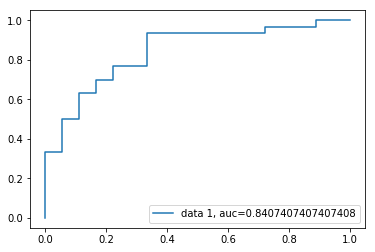

In [117]:
# import the metrics class
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
y_pred_proba = lr.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [96]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)
    
    

    
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)

('the', 0.8196519770430436)
('picture', 0.6968312397393778)
('it', 0.5873182323662446)
('too', 0.5691968763542593)
('maybe', 0.5336857188054845)
('action', -1.2393153411321651)
('be', -0.9122219934209846)
('overflowing', -0.8548756285381534)
('open', -0.8386822248347726)
('reaching', -0.7438025653453079)
